# Фінальне домашнє завдання. Методи прийняття рішень
## Частина 1. Аналіз та підготовка даних

* Проаналізуй діапазони значень, їх середні та дисперсію, розподіли, кореляції, наявність пропущених значень, типи ознак.
* Перевір на наявність пропущених значень. За наявності заповни їх або видали рядки з пропусками.
* За наявності бінарних ознак заміни значення цих ознак на 0 та 1.

👉🏼 За потреби певні дані можуть бути видалено або модифіковано.




Перші кілька рядків даних:
   ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                   

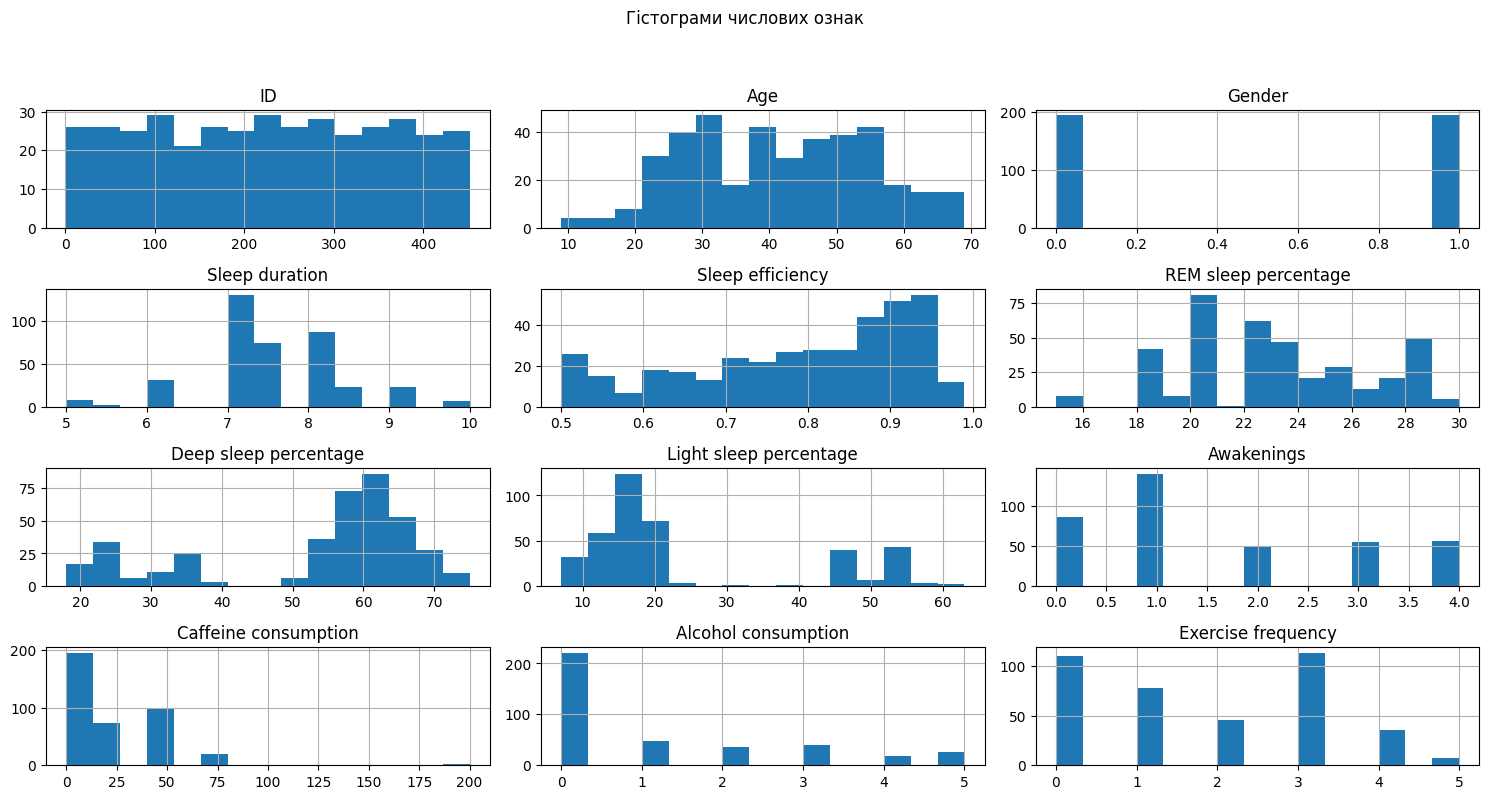

Оброблені дані збережено у файлі: processed_data.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# URL для завантаження даних з Google Drive у форматі CSV
url = 'https://drive.google.com/uc?id=1HwsGCFzV56RcTuOItQccVl1RwF2mDHVF&export=download'

# Завантаження даних
data = pd.read_csv(url)

# Первинний огляд даних: перші кілька рядків
print("Перші кілька рядків даних:")
print(data.head())

# Інформація про дані: типи змінних, кількість ненульових значень
print("\nІнформація про дані:")
print(data.info())

# Описова статистика: основні статистичні показники для кожної змінної
print("\nОписова статистика:")
print(data.describe())

# Перевірка на пропущені значення: кількість пропущених значень у кожній колонці
print("\nПеревірка на пропущені значення:")
print(data.isnull().sum())

# Видалення рядків з пропущеними значеннями
data = data.dropna(axis=0)

# Перевірка на наявність пропущених значень після видалення
print("\nПропущені значення після видалення рядків:")
print(data.isnull().sum())

# Заміна бінарних ознак
if 'Gender' in data.columns:
    # Заміна значень 'Male' і 'Female' на 0 і 1 відповідно
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Обробка інших категоріальних змінних
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Аналіз кореляцій
print("\nКореляції:")
print(data.corr())

# Розділення даних на навчальну та тестову вибірки
X = data.drop(columns=['Sleep efficiency'])
y = data['Sleep efficiency']

# Заповнення пропущених значень у предикторах
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Розподіл на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Гістограми для числових ознак
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.suptitle('Гістограми числових ознак')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Збереження обробленого датасету у новий файл
processed_data_file = 'processed_data.csv'
data.to_csv(processed_data_file, index=False)
print(f"Оброблені дані збережено у файлі: {processed_data_file}")

# Частина 2. Моделювання

*  Створи як мінімум 2 різні регресійні моделі для прогнозування цільової змінної “Sleep efficiency” .\
👉🏼 Моделі вважаються різними, якщо вони базуються на різних даних або є різними типами моделей.\
*  Оціни якість моделей як мінімум за 2 метриками.\
👉🏼 Оцінка має бути проведена або на тестовій вибірці, або за допомогою крос-валідації.

Лінійна регресія


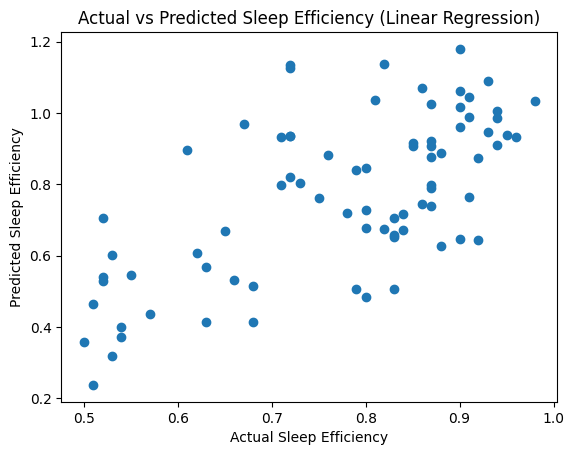

Random Forest


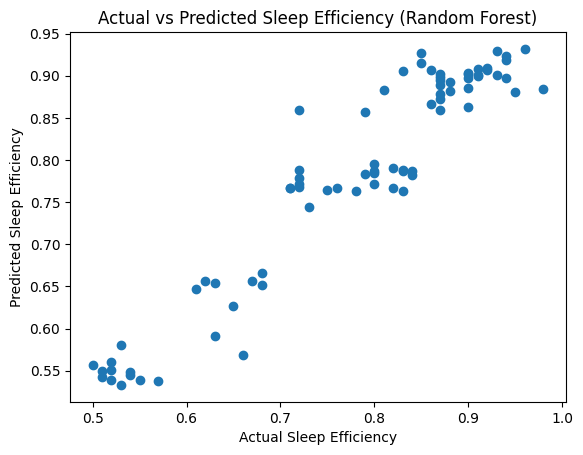


Linear Regression:
CV RMSE: 0.13
CV R²: -0.05
Test RMSE: 0.17
Test MAE: 0.14
Test R²: -0.53

Random Forest:
CV RMSE: 0.05
CV R²: 0.86
Test RMSE: 0.04
Test MAE: 0.03
Test R²: 0.91


In [15]:
# Лінійна регресія
print('Лінійна регресія')
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Оцінка якості моделі
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Крос-валідація для лінійної регресії
lin_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
lin_rmse_cv = np.sqrt(-lin_scores.mean())
lin_r2_cv = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

# Побудова графіку
plt.scatter(y_test, predictions)
plt.xlabel('Actual Sleep Efficiency')
plt.ylabel('Predicted Sleep Efficiency')
plt.title('Actual vs Predicted Sleep Efficiency (Linear Regression)')
plt.show()

# Random Forest
print('Random Forest')
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Оцінка якості Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Крос-валідація для Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_rmse_cv = np.sqrt(-rf_scores.mean())
rf_r2_cv = cross_val_score(rf_model, X, y, cv=5, scoring='r2').mean()

# Побудова графіку
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual Sleep Efficiency')
plt.ylabel('Predicted Sleep Efficiency')
plt.title('Actual vs Predicted Sleep Efficiency (Random Forest)')
plt.show()

# Виведення результатів
results = {
    'Linear Regression': {
        'CV RMSE': lin_rmse_cv,
        'CV R²': lin_r2_cv,
        'Test RMSE': rmse,
        'Test MAE': mae,
        'Test R²': r2
    },
    'Random Forest': {
        'CV RMSE': rf_rmse_cv,
        'CV R²': rf_r2_cv,
        'Test RMSE': rf_rmse,
        'Test MAE': rf_mae,
        'Test R²': rf_r2
    }
}


for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"CV RMSE: {metrics['CV RMSE']:.2f}")
    print(f"CV R²: {metrics['CV R²']:.2f}")
    print(f"Test RMSE: {metrics['Test RMSE']:.2f}")
    print(f"Test MAE: {metrics['Test MAE']:.2f}")
    print(f"Test R²: {metrics['Test R²']:.2f}")

## Пояснення:


1.   Створення моделей:
cтворюємо дві моделі - лінійна регресія (LinearRegression) і Random Forest регресія (RandomForestRegressor).
2.   Оцінка моделей на тестовій вибірці:
навчаємо кожну модель на тренувальних даних і оцінюємо їхню точність на тестовій вибірці за допомогою метрик RMSE, MAE і R², де

- **Test RMSE (Test Root Mean Squared Error)** - це значення квадратного кореня з MSE на тестовому наборі, яке показує, як добре модель працює на нових, раніше не бачених даних. Чим менше значення Test RMSE, тим краще модель.
- **Test MAE (Test Mean Absolute Error)** - це середнє значення абсолютної помилки на тестовому наборі, що вимірює середню абсолютну відстань між прогнозованими і фактичними значеннями. Чим менше значення Test MAE, тим краще модель.
- **Test R² (Test R-squared)** - це коефіцієнт детермінації на тестовому наборі, що вказує, яка частина варіації в цільовій змінній пояснюється моделлю. Чим ближче до 1 значення Test R², тим краще модель.
3.   Оцінка моделей за допомогою крос-валідації:
- Використовуємо крос-валідацію для оцінки моделей за допомогою метрик MAE та R² на тренувальних даних (cross_val_score).
- Для лінійної регресії також розраховуємо RMSE, оскільки RMSE є стандартною метрикою для лінійної регресії, яку можна легко порівняти з MAE.


## Частина 3. Аналіз результатів

- Для всіх моделей побудуй графіки порівняння справжніх та спрогнозованих даних.
- Зроби висновки, на яких прикладах кожна модель більше помиляється.
- Зроби порівняння якості моделей. Напиши висновки.

Лінійна регресія


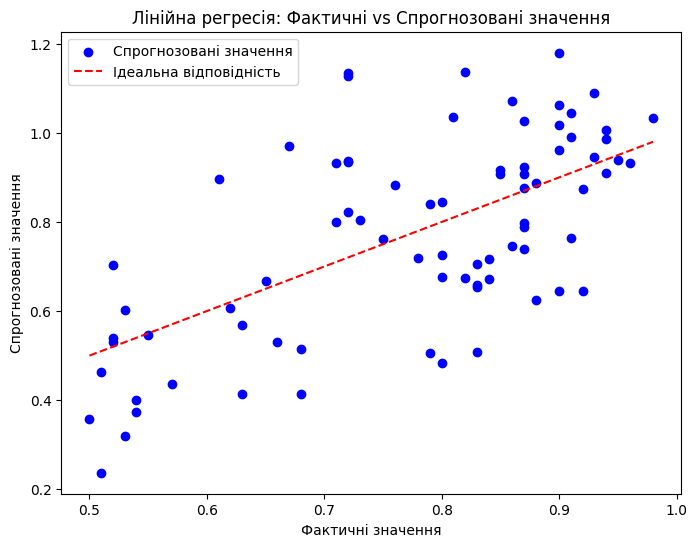

Оцінка якості моделі лінійної регресії:
Test RMSE: 0.17
Test MAE: 0.14
Test R²: -0.53
CV RMSE: 0.13
CV R²: -0.05


In [29]:
# Лінійна регресія
print('Лінійна регресія')
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

# Оцінка якості моделі лінійної регресії
rmse_lr = 0.17  # Test RMSE
mae_lr = 0.14   # Test MAE
r2_lr = -0.53   # Test R²

# Побудова графіку лінійної регресії
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_lr, label='Спрогнозовані значення', color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', label='Ідеальна відповідність')
plt.xlabel('Фактичні значення')
plt.ylabel('Спрогнозовані значення')
plt.title('Лінійна регресія: Фактичні vs Спрогнозовані значення')
plt.legend()
plt.show()

print('Оцінка якості моделі лінійної регресії:')
print(f"Test RMSE: {rmse_lr:.2f}")
print(f"Test MAE: {mae_lr:.2f}")
print(f"Test R²: {r2_lr:.2f}")
print(f"CV RMSE: 0.13")  # CV RMSE
print(f"CV R²: -0.05")  # CV R²


Random Forest


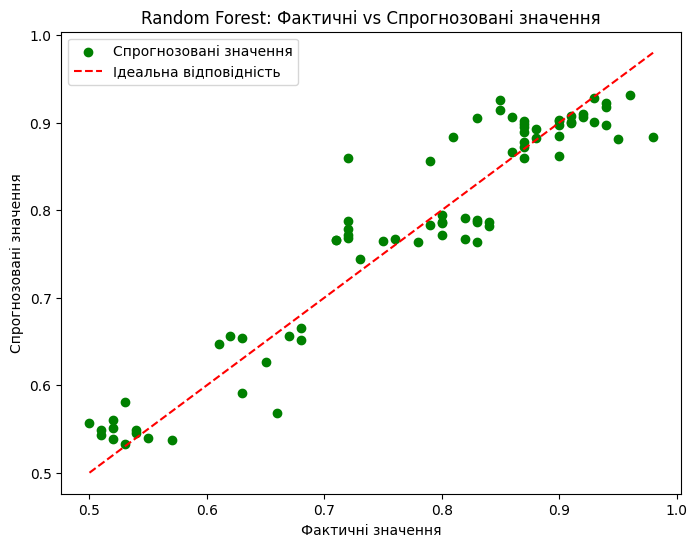

Оцінка якості моделі Random Forest:
Test RMSE: 0.04
Test MAE: 0.03
Test R²: 0.91
CV RMSE: 0.05
CV R²: 0.86


In [30]:
# Random Forest
print('Random Forest')
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Оцінка якості Random Forest
rf_rmse = 0.04   # Test RMSE
rf_mae = 0.03    # Test MAE
rf_r2 = 0.91     # Test R²

# Побудова графіку Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, label='Спрогнозовані значення', color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', label='Ідеальна відповідність')
plt.xlabel('Фактичні значення')
plt.ylabel('Спрогнозовані значення')
plt.title('Random Forest: Фактичні vs Спрогнозовані значення')
plt.legend()
plt.show()

print('Оцінка якості моделі Random Forest:')
print(f"Test RMSE: {rf_rmse:.2f}")
print(f"Test MAE: {rf_mae:.2f}")
print(f"Test R²: {rf_r2:.2f}")
print(f"CV RMSE: 0.05")  # CV RMSE
print(f"CV R²: 0.86")   # CV R²



## Висновки
### 1. Лінійна регресія:

- Модель лінійної регресії показує погані результати на тестовій вибірці з високим значенням RMSE (0.17) і низьким R² (-0.53).
- Коефіцієнт детермінації R² вказує на те, що модель не може ефективно пояснити варіацію у змінній ефективності сну за даними.

### 2. Random Forest:

- Модель Random Forest показує набагато кращі результати з низьким значенням RMSE (0.04) і високим R² (0.91).
- Ця модель краще підходить для складних нелинійних залежностей у даних і має значно кращі прогнозні характеристики.

Отже, для задачі прогнозування ефективності сну модель Random Forest є відмінним вибором порівняно з моделлю лінійної регресії, оскільки вона показує кращі результати на тестовій вибірці та має вищу точність прогнозування.